### Spectroscopic Data Analysis
        Sean Keenan, PhD Physics
        Quantum Memories Group, Heriot-Watt University, Edinburgh
        2021

In [1]:
import spec_funcs as sf
import fit_funcs as ff

##### Set-up script
        Select input folder and polarisation

In [2]:
# folder containing all the requisite subfolders and data - refrences included
path = r"C:\Users\sk88\Desktop\0222_BB"
# mark energies / wavelengths of interest
woi = [595.27, 604.23, 605.40]
# calibrate wavelength of OSA
calibration = -1.12352
# reference names
refs = "ref", "reference", "R"
# file extension types
exts = (".csv", ".txt", ".CSV")
exceptions = ("notes", "setup", "ignore")

##### Import Raw Spectroscopy Data
        Load raw data from csv file (delimiter is not a problem) and sort into groups - polarisations -> reference / spectrum


c:\Users\sk88\Documents\Python\Spectroscopy\spec_funcs.py:309: RuntimeWarning: divide by zero encountered in divide
  sec_ax = ax.secondary_xaxis('top', functions= (lambda x: 1e7 / x, lambda x: 1e7 / x))


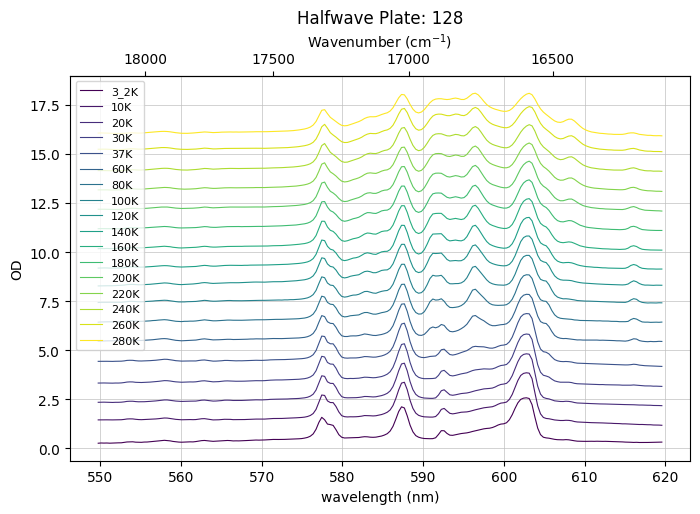

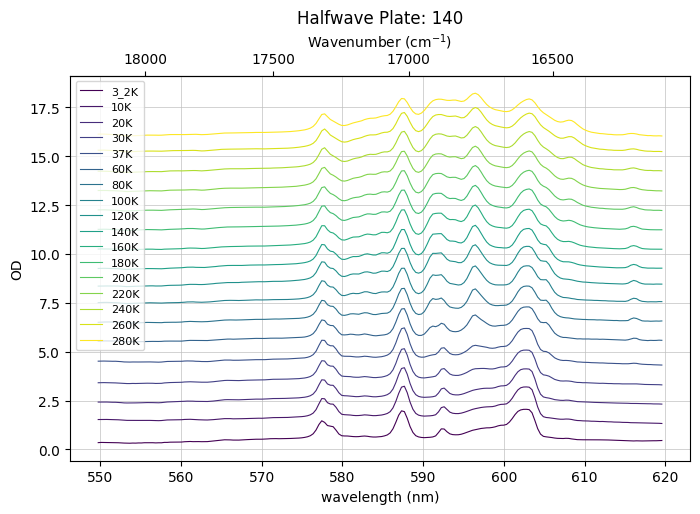

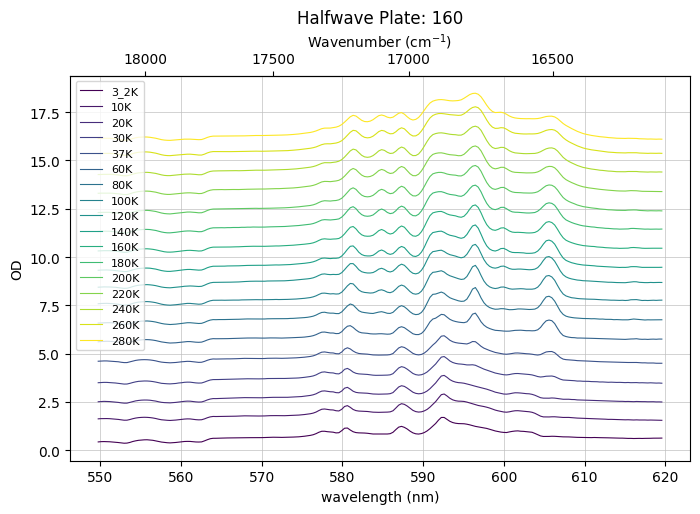

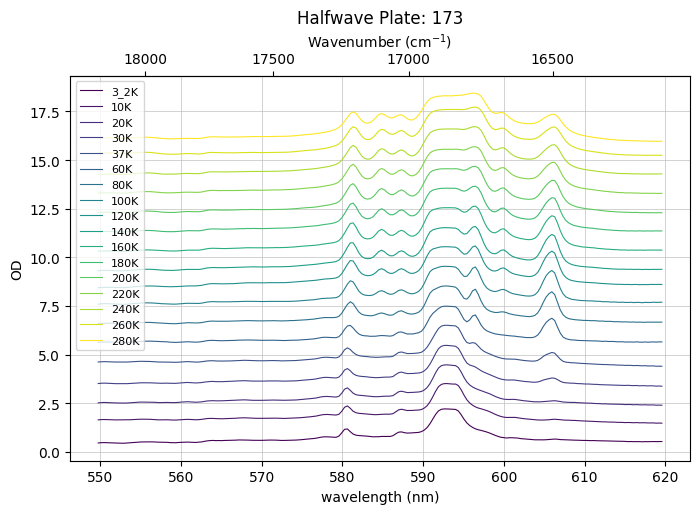

In [3]:
folder_list, file_list = sf.dir_interogate(path, exts, exceptions)
path_names = sf.read_files(folder_list, file_list)
ref_names, data_names = sf.search_paths(path_names, refs)
polarisations = sf.find_polarisations(ref_names, tail=1)
ref_data = sf.data_extract(ref_names, polarisations)
data_sets = sf.data_extract(data_names, polarisations)
wave_sets, OD_sets = sf.OD_calc(ref_data, data_sets, correction=True, c_factor=1)
shifted_sets = sf.data_shift(wave_sets, calibration)
labels = 'wavelength (nm)', 'OD'
sf.plotter(shifted_sets, OD_sets, keys=polarisations, axis_lbls=labels, lims=[550, 620], shifter=1, woi=None, save=False, data_labels=folder_list)

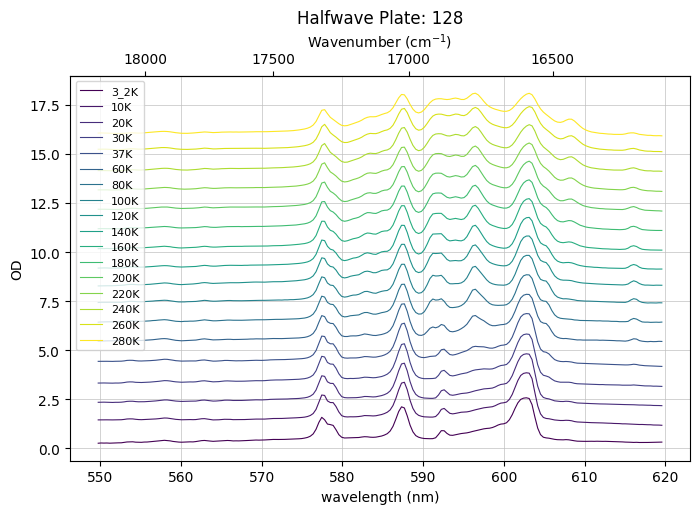

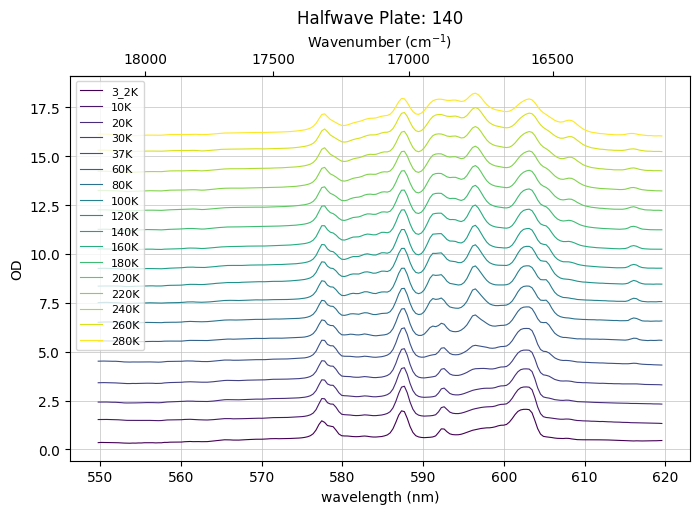

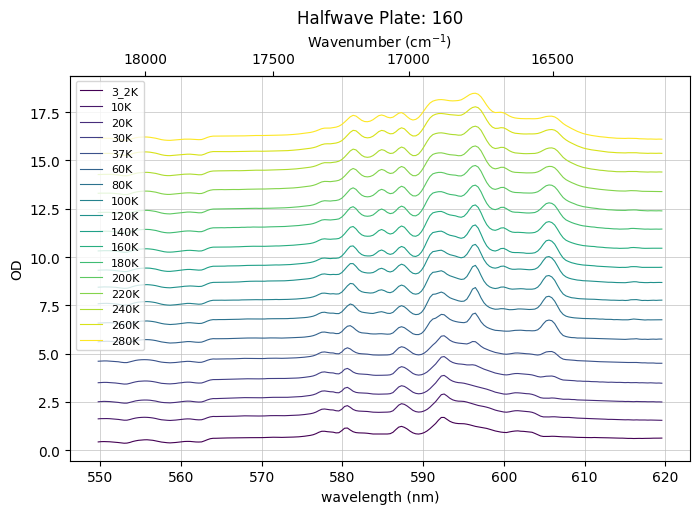

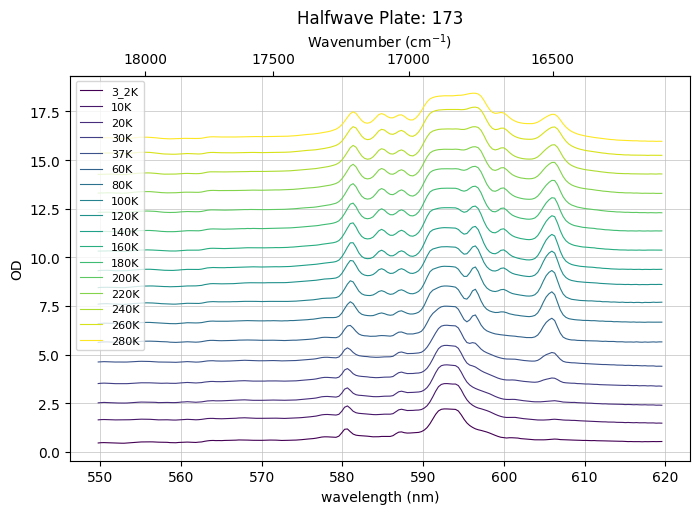

In [4]:
OD_smoothed = sf.smooth_data(OD_sets, 0.2)
sf.plotter(shifted_sets, OD_smoothed, keys=polarisations, axis_lbls=labels, lims=[550, 620], shifter=1, woi=None, save=False, data_labels=folder_list)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


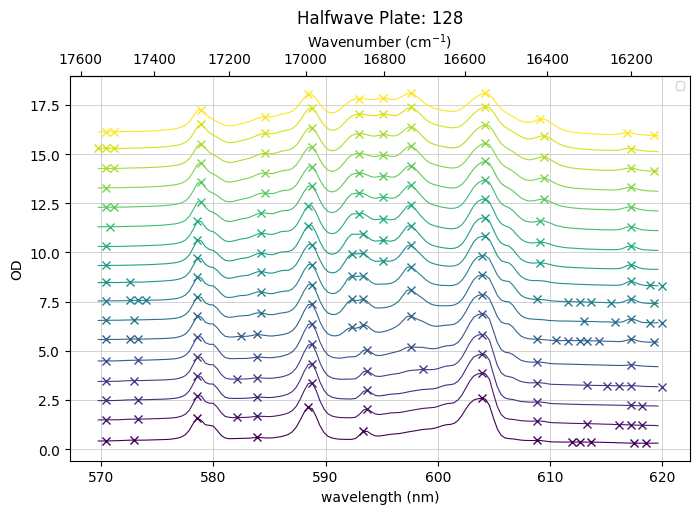

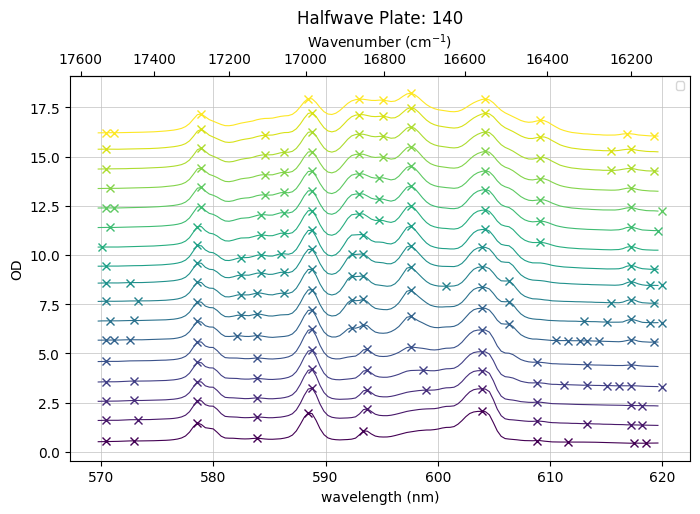

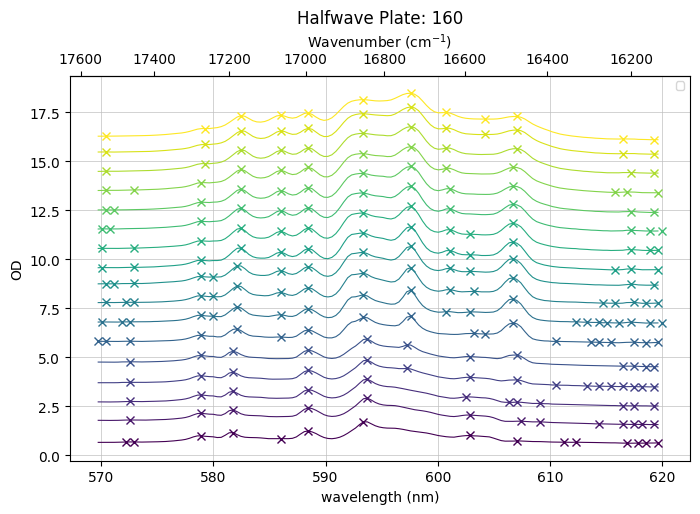

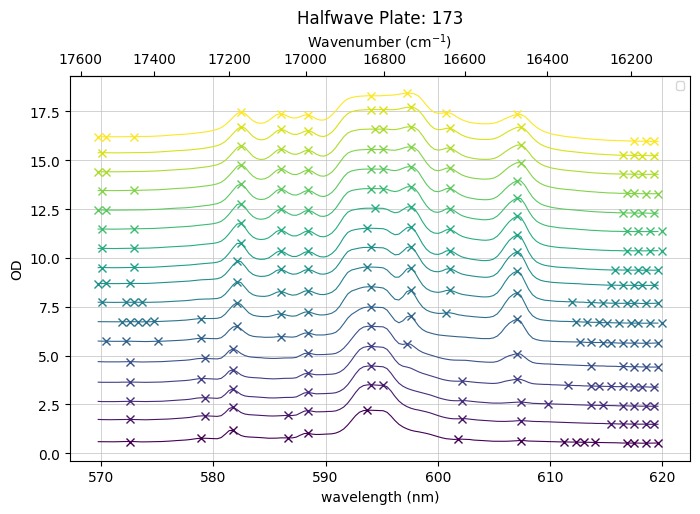

In [5]:
peaks = sf.peak_find(OD_smoothed, args=[0.1, 0.1])
sf.plotter(x_data=wave_sets, y_data=OD_smoothed, data_indexes=peaks, keys=polarisations, axis_lbls=labels, shifter=1, lims=[570, 620])

In [6]:
diff = np.diff(roi_ODs[4][0], n=1)
diff_2 = np.diff(roi_ODs[4][0], n=2)
diff_3 = np.diff(roi_ODs[4][0], n=3)

mp.plot(diff)
#mp.plot(diff_2)
#mp.plot(diff_3)
mp.plot(roi_ODs[4][0])

NameError: name 'np' is not defined

In [ ]:
x =np.linspace(-100, 100, 10000)
amp_g = 40
amp_l = 20
y_0 = 0
x_0g = 1
x_0l = -1
sigma = 15
gamma = 40
eta = 0.8

gauss = sf.gaussian(x, amp_g, y_0, x_0g, sigma)
lorentz = sf.lorentzian(x, amp_l, y_0, x_0l, gamma)
noise = np.random.normal(size=np.size(gauss))

voigt = sf.pseudo_voigt(x, y_0, amp_g, x_0g, sigma, amp_l, x_0l, gamma, eta) + noise

mp.plot(x, gauss, 'r', label='gauss')
mp.plot(x, lorentz, 'b', label='lorentz')
mp.plot(x, voigt, 'orange', alpha=0.5, label='voigt')
mp.legend()

In [ ]:
fit_g = sf.fitgauss(x, voigt)
fit_l = sf.fitlorentz(x, voigt)
fit_v = sf.fitgls(x, voigt)

mp.plot(x, sf.lorentzian(x, *fit_l[0]), '--b', label='lorentz fit')
mp.plot(x, sf.gaussian(x, *fit_g[0]), '--g', label='gauss fit')
mp.plot(x, sf.pseudo_voigt(x, *fit_v[0]), '--r', label='voigt fit')
mp.plot(x, voigt, color='orange', alpha=0.5, label='noisey voigt')
mp.legend()